Fazendo download da base

In [2]:
! wget "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"


--2021-10-16 16:24:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K   317KB/s    in 0.3s    

2021-10-16 16:24:47 (317 KB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [3]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Carregando o CSV

In [4]:
raw_df = pd.read_csv("winequality-red.csv", delimiter=";", header=None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1598,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


Escolhido o target sendo a última coluna

In [19]:
X = raw_df.values[1:,1:]
y = raw_df.values[1:,0]
# from sklearn.datasets import load_boston
# boston = load_boston()
# X, y = boston.data, boston.target

X, y

(array([['0.7', '0', '1.9', ..., '0.56', '9.4', '5'],
        ['0.88', '0', '2.6', ..., '0.68', '9.8', '5'],
        ['0.76', '0.04', '2.3', ..., '0.65', '9.8', '5'],
        ...,
        ['0.51', '0.13', '2.3', ..., '0.75', '11', '6'],
        ['0.645', '0.12', '2', ..., '0.71', '10.2', '5'],
        ['0.31', '0.47', '3.6', ..., '0.66', '11', '6']], dtype=object),
 array(['7.4', '7.8', '7.8', ..., '6.3', '5.9', '6'], dtype=object))

Analisando o target com cada caracteristica

0


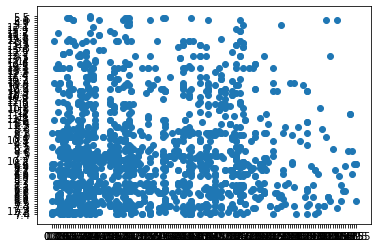

1


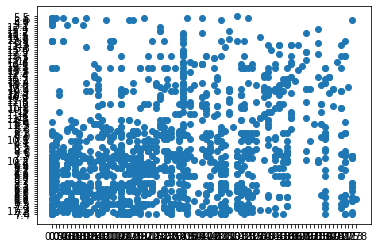

2


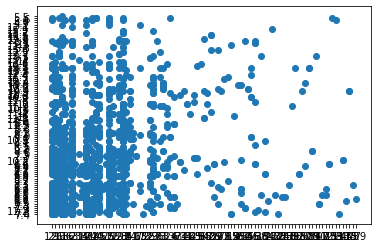

3


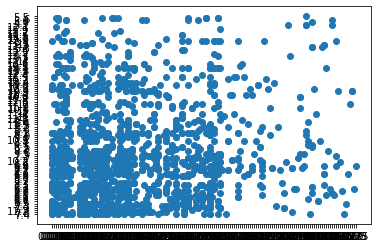

4


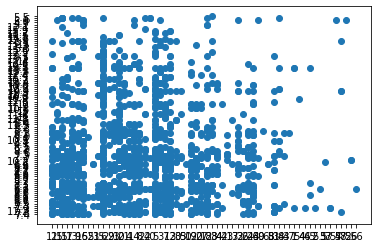

5


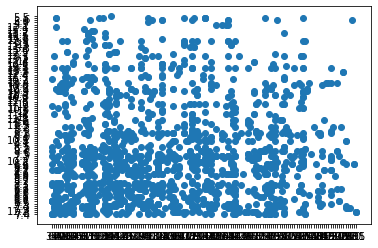

6


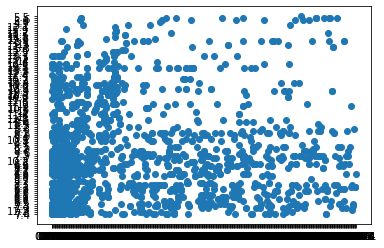

7


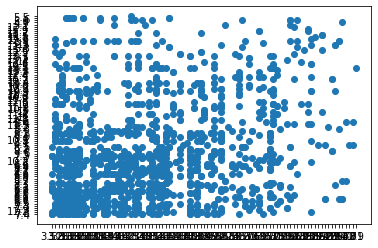

8


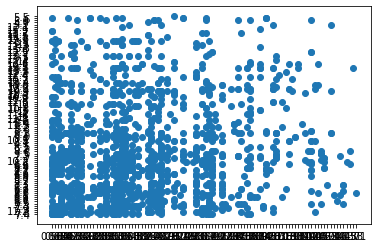

9


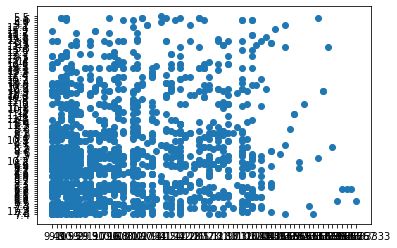

10


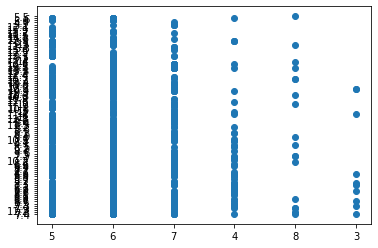

In [20]:
for i in range(X.shape[1]):
  print(i)
  plt.scatter(X[:,i], y)
  plt.show()

In [21]:
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)

print("MSE:", mean_squared_error(y, ypred))
print("intercept_:", modelo.intercept_)
print("coef_:", modelo.coef_)

MSE: 0.38979677887142833
intercept_: -631.8086781521325
coef_: [ 2.57315041e-01  1.89353033e+00 -2.49393905e-01 -3.72467143e+00
  9.10831459e-03 -6.42736137e-03  6.54859836e+02 -5.29247302e+00
 -6.91054530e-01  5.47838501e-01  2.33733310e-02]


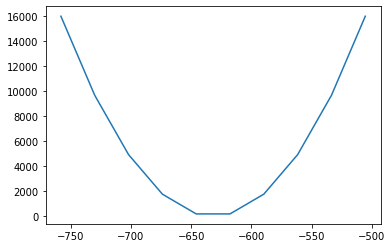

In [22]:
def plot_parabola(modelo, X, y, intercept_):
  erro_arr = []
  delta_arr = np.linspace(intercept_*0.8,intercept_*1.2, 10)
  for i in range(len(delta_arr)):
    modelo.intercept_ = delta_arr[i]
    ypred = modelo.predict(X)
    mse = mean_squared_error(y, ypred)
    erro_arr.append(mse)
  
  plt.plot(delta_arr,erro_arr)
  
plot_parabola(modelo, X, y, modelo.intercept_)